## 1. Introduction

🏁 Welcome! This is a Jupyter Notebook.

> 📌 <b>Goal</b>:This notebook has the purpose of analysing and predicting the correct     class based on some features, as well as testing different algorithms.
  you can download the dataset from the link below: (https://drive.google.com/drive/folders/1p49msiIugNvqst7AQFPg0toOpnkzljk3).

### Libraries📚

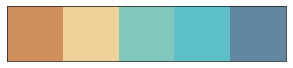

In [5]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
%matplotlib inline

my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]

sns.palplot(sns.color_palette(my_colors))

sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

class color: 
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'

### 📥 Read in Data

In [6]:
df = pd.read_csv("Dataset.csv")
df.head() 

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


> Seems like we have a lot of NaNs in our datasets 
> further exploration to the dataset will

<AxesSubplot:>

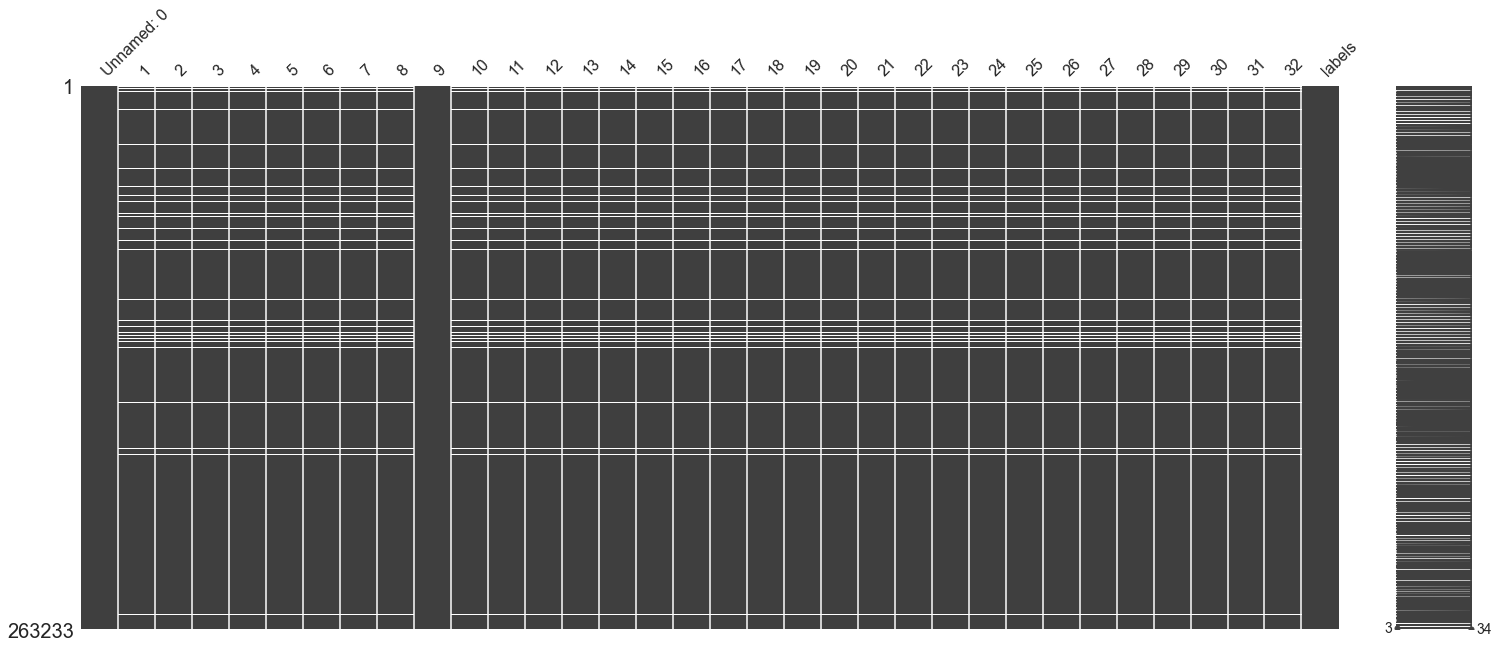

In [7]:
msno.matrix(df)

In [8]:
df.shape

(263233, 34)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263233 entries, 0 to 263232
Data columns (total 34 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  263233 non-null  int64  
 1   1           248033 non-null  float64
 2   2           248033 non-null  float64
 3   3           248033 non-null  float64
 4   4           248033 non-null  float64
 5   5           248033 non-null  float64
 6   6           248033 non-null  float64
 7   7           248033 non-null  float64
 8   8           248033 non-null  float64
 9   9           263233 non-null  int64  
 10  10          248033 non-null  float64
 11  11          248033 non-null  float64
 12  12          248033 non-null  float64
 13  13          248033 non-null  float64
 14  14          248033 non-null  float64
 15  15          248033 non-null  float64
 16  16          248033 non-null  float64
 17  17          248033 non-null  float64
 18  18          248033 non-null  float64
 19  19

In [10]:
df.describe() # We have many zeros we can fix it later by using imputer 

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,263233.000000,248033.000000,248033.000000,248033.0,248033.0,248033.000000,248033.000000,248033.000000,248033.000000,263233.000000,...,248033.000000,248033.000000,2.480330e+05,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000
mean,131616.000000,0.011627,42.508344,0.0,0.0,10.766156,10.419944,10.783605,10.550265,40.064718,...,5990.391986,3698.208704,2.597057e+05,16927.389904,3213.152762,4487.807348,15942.211091,12703.819586,3376.750708,3495.836558
std,75988.966042,0.417756,35.178964,0.0,0.0,9.317414,9.396263,9.320837,9.386952,35.567821,...,1713.091764,1720.559075,2.226271e+05,6214.013360,1549.293967,1959.777872,5729.530428,4251.094856,1422.872554,1375.360707
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,253.000000,0.000000,1.265000e+03,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
25%,65808.000000,0.000000,9.000000,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,...,5254.700000,3078.697465,4.704500e+04,14129.000000,3266.000000,3315.000000,13460.760000,10512.450000,3268.800000,3279.300000
50%,131616.000000,0.000000,36.000000,0.0,0.0,9.000000,8.000000,9.000000,9.000000,32.000000,...,5971.448718,3963.668757,2.141190e+05,18457.000000,3276.000000,3327.000000,16549.050000,13807.500000,3277.820000,3281.000000
75%,197424.000000,0.000000,71.000000,0.0,0.0,18.000000,18.000000,18.000000,18.000000,69.000000,...,6542.142857,4595.049066,4.407100e+05,22789.000000,3281.000000,5474.000000,20623.040000,15661.200000,3281.240000,3283.250000
max,263232.000000,35.000000,206.000000,0.0,0.0,66.000000,54.000000,60.000000,65.000000,206.000000,...,25447.200000,31354.450640,1.367386e+06,57611.000000,22900.000000,22900.000000,57586.600000,57585.000000,22900.000000,22900.000000


<AxesSubplot:>

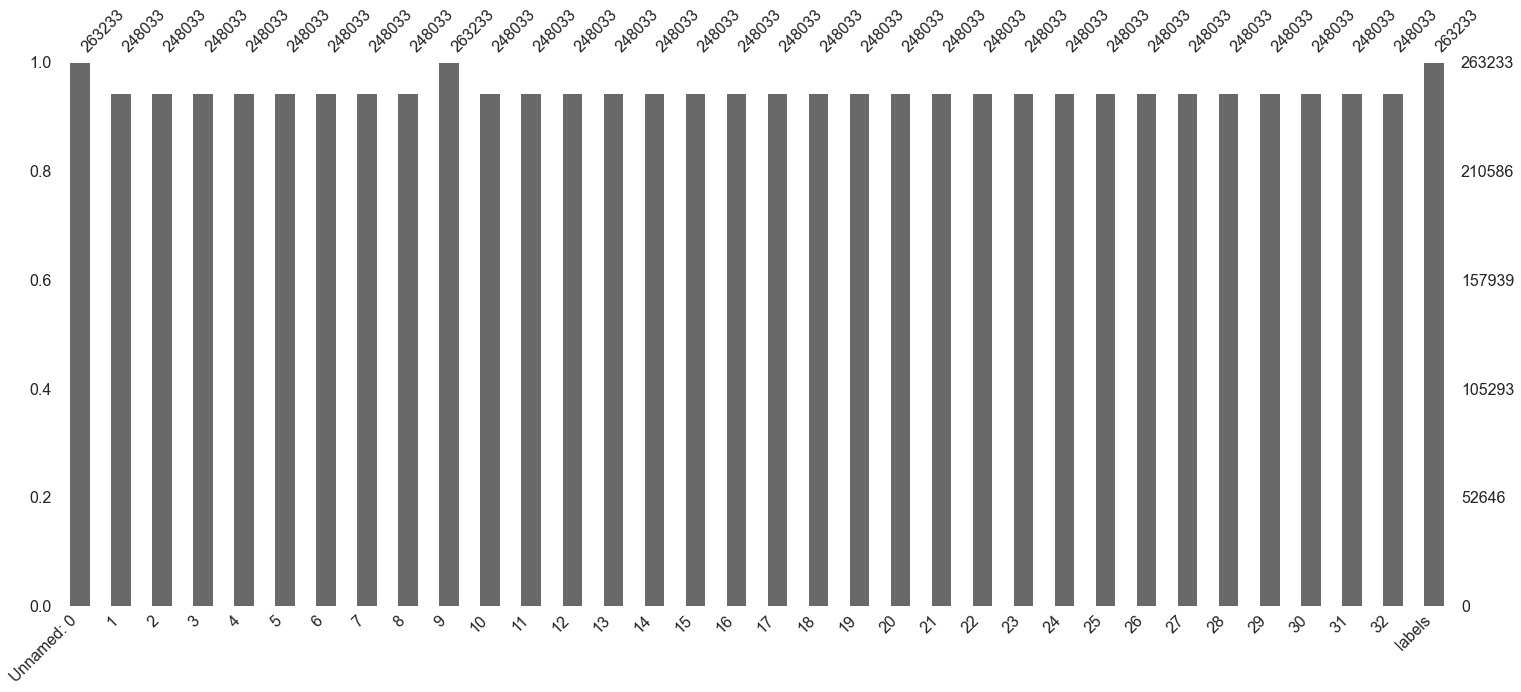

In [11]:
msno.bar(df)

> As we can see most of our columns nearly have the same number of NaNs so we can either drop out them or investigate more on the data.

> We can try to isolate null data and use it later.

In [12]:
df.dropna(how = 'any', inplace=True)
df.shape

(248033, 34)

<AxesSubplot:>

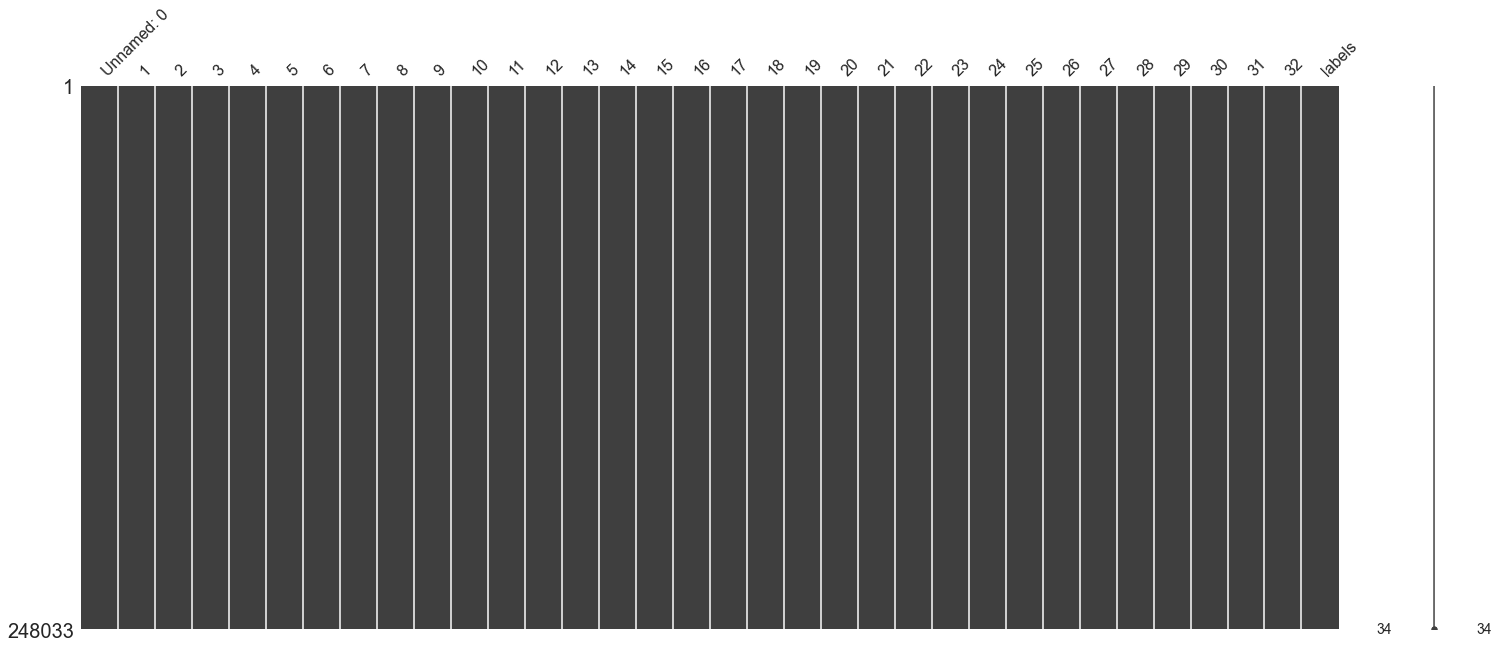

In [13]:
msno.matrix(df)

In [14]:
df = df.reset_index(drop=True)

In [15]:
df

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
0,576,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5,...,2388.779228,25149.0,7648.0,3264.0,3314.0,7647.88,7647.40,3264.56,3266.80,False
1,577,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4,...,2175.921625,17529.0,7646.0,3268.0,3308.0,7516.07,6996.35,3268.96,3272.80,False
2,579,0.0,9.0,0.0,0.0,3.0,0.0,5.0,1.0,9,...,5279.029717,64317.0,18443.0,3278.0,5434.0,17924.52,15850.60,3278.64,3281.20,False
3,584,0.0,15.0,0.0,0.0,5.0,3.0,2.0,5.0,15,...,2844.509846,75808.0,11998.0,1312.0,3328.0,11689.30,10454.50,1588.50,2694.50,False
4,585,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,7,...,3715.626910,59983.0,14108.0,3312.0,7647.0,13980.80,13472.00,3441.84,3961.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248028,263228,0.0,104.0,0.0,0.0,30.0,28.0,22.0,24.0,104,...,3977.504510,541211.0,22819.0,1312.0,3317.0,22738.38,14128.00,3272.21,3279.00,False
248029,263229,0.0,88.0,0.0,0.0,26.0,28.0,13.0,21.0,88,...,5248.834698,600588.0,22848.0,3265.0,4383.0,22787.10,18537.10,3266.74,3278.35,False
248030,263230,0.0,121.0,0.0,0.0,41.0,23.0,27.0,30.0,121,...,5332.684289,824870.0,22848.0,3272.0,3865.0,22824.60,20594.00,3277.00,3281.00,False
248031,263231,0.0,116.0,0.0,0.0,28.0,34.0,24.0,30.0,116,...,4605.302967,693174.0,22766.0,3268.0,3325.0,22371.60,16836.00,3272.90,3281.25,False


In [16]:
df[df['labels'] == True]

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,labels
9410,10833,19.0,69.0,0.0,0.0,24.0,21.0,18.0,25.0,88,...,4457.667012,500470.0,22970.0,253.0,3322.0,22802.96,15528.00,253.00,2458.35,True
9411,10834,16.0,46.0,0.0,0.0,12.0,16.0,21.0,13.0,62,...,4583.490151,354413.0,22825.0,2458.0,3323.0,22814.63,14047.45,2458.00,2471.05,True
9412,10835,9.0,2.0,0.0,0.0,2.0,4.0,1.0,4.0,11,...,1505.037299,34732.0,7631.0,2457.0,2758.0,7199.60,5474.00,2458.60,2465.00,True
9413,10836,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,...,0.707107,5749.0,2875.0,2874.0,2875.0,2874.99,2874.95,2874.01,2874.05,True
9414,10837,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2,...,0.000000,4916.0,2458.0,2458.0,2458.0,2458.00,2458.00,2458.00,2458.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244661,259840,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2,...,9.192388,6573.0,3293.0,3280.0,3287.0,3292.87,3292.35,3280.13,3280.65,True
244662,259841,0.0,6.0,0.0,0.0,2.0,2.0,2.0,0.0,6,...,4416.055906,35045.0,14133.0,3313.0,3319.0,13808.65,12511.25,3313.10,3313.50,True
244663,259842,0.0,4.0,0.0,0.0,2.0,0.0,1.0,1.0,4,...,4679.429915,30566.0,14131.0,3294.0,6571.0,13936.93,13160.65,3359.55,3621.75,True
244664,259843,0.0,4.0,0.0,0.0,0.0,0.0,3.0,1.0,4,...,6214.659517,28399.0,16295.0,3312.0,4396.0,15970.52,14672.60,3312.03,3312.15,True


> As we can see that our (True) labels is nearly only 1500, while our (False) labeled is nearly 230,000.

> Okey, now we have features but what does they mean or actually how much do we need to know about these features The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values. These type of information helps to understand about what is going on data.

In [17]:
df.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,248033.000000,248033.000000,248033.000000,248033.0,248033.0,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000,...,248033.000000,248033.000000,2.480330e+05,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000,248033.000000
mean,134199.234844,0.011627,42.508344,0.0,0.0,10.766156,10.419944,10.783605,10.550265,42.519971,...,5990.391986,3698.208704,2.597057e+05,16927.389904,3213.152762,4487.807348,15942.211091,12703.819586,3376.750708,3495.836558
std,75763.344520,0.417756,35.178964,0.0,0.0,9.317414,9.396263,9.320837,9.386952,35.188048,...,1713.091764,1720.559075,2.226271e+05,6214.013360,1549.293967,1959.777872,5729.530428,4251.094856,1422.872554,1375.360707
min,576.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,253.000000,0.000000,1.265000e+03,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
25%,68652.000000,0.000000,9.000000,0.0,0.0,2.000000,2.000000,2.000000,2.000000,9.000000,...,5254.700000,3078.697465,4.704500e+04,14129.000000,3266.000000,3315.000000,13460.760000,10512.450000,3268.800000,3279.300000
50%,135911.000000,0.000000,36.000000,0.0,0.0,9.000000,8.000000,9.000000,9.000000,36.000000,...,5971.448718,3963.668757,2.141190e+05,18457.000000,3276.000000,3327.000000,16549.050000,13807.500000,3277.820000,3281.000000
75%,199985.000000,0.000000,71.000000,0.0,0.0,18.000000,18.000000,18.000000,18.000000,71.000000,...,6542.142857,4595.049066,4.407100e+05,22789.000000,3281.000000,5474.000000,20623.040000,15661.200000,3281.240000,3283.250000
max,263232.000000,35.000000,206.000000,0.0,0.0,66.000000,54.000000,60.000000,65.000000,206.000000,...,25447.200000,31354.450640,1.367386e+06,57611.000000,22900.000000,22900.000000,57586.600000,57585.000000,22900.000000,22900.000000


> we can clearly see that we've a lot of zeros in our dataset and 2 columns(3,4) are all zeros.And the first column have one input value.

> we can drop them and visualize the rest to get a better overview 

> seems like the (0) column is just an id so we can drop it as well.

> herefore, drop these unnecessary features. However do not forget this is not a feature selection.

In [18]:
df = df.drop(['1','3','4'], axis=1)

In [19]:
df = df.drop('Unnamed: 0', axis =1)

In [20]:
df

,2,5,6,7,8,9,10,11,12,13,...,24,25,26,27,28,29,30,31,32,labels
0,5.0,0.0,0.0,0.0,5.0,5,2.0,3.0,0.0,246.744600,...,2388.779228,25149.0,7648.0,3264.0,3314.0,7647.88,7647.40,3264.56,3266.80,False
1,4.0,0.0,4.0,0.0,0.0,4,1.0,2.0,1.0,194.192000,...,2175.921625,17529.0,7646.0,3268.0,3308.0,7516.07,6996.35,3268.96,3272.80,False
2,9.0,3.0,0.0,5.0,1.0,9,4.0,5.0,0.0,296.850111,...,5279.029717,64317.0,18443.0,3278.0,5434.0,17924.52,15850.60,3278.64,3281.20,False
3,15.0,5.0,3.0,2.0,5.0,15,5.0,5.0,5.0,207.600133,...,2844.509846,75808.0,11998.0,1312.0,3328.0,11689.30,10454.50,1588.50,2694.50,False
4,7.0,7.0,0.0,0.0,0.0,7,2.0,3.0,2.0,322.006429,...,3715.626910,59983.0,14108.0,3312.0,7647.0,13980.80,13472.00,3441.84,3961.20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248028,104.0,30.0,28.0,22.0,24.0,104,26.0,54.0,24.0,277.928442,...,3977.504510,541211.0,22819.0,1312.0,3317.0,22738.38,14128.00,3272.21,3279.00,False
248029,88.0,26.0,28.0,13.0,21.0,88,22.0,42.0,24.0,260.782829,...,5248.834698,600588.0,22848.0,3265.0,4383.0,22787.10,18537.10,3266.74,3278.35,False
248030,121.0,41.0,23.0,27.0,30.0,121,30.0,61.0,30.0,254.404851,...,5332.684289,824870.0,22848.0,3272.0,3865.0,22824.60,20594.00,3277.00,3281.00,False
248031,116.0,28.0,34.0,24.0,30.0,116,29.0,59.0,28.0,226.216078,...,4605.302967,693174.0,22766.0,3268.0,3325.0,22371.60,16836.00,3272.90,3281.25,False


In [21]:
# (y) includes our labels and (x) includes our features 

y = df.labels

x = df.drop('labels',axis=1)

In [22]:
z = x.replace(0,np.nan)
z.isna().sum()

2        11
5     26120
6     33635
7     25743
8     31295
9         0
10    22400
11     9358
12    24085
13        0
14    10659
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24    10987
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
dtype: int64

> Looks like we have a lot of zeros as well on our dataset.
> We will replace them with the mean of numbers as a filling in value.

In [23]:
x = x.replace(0,np.nan)

x = x.fillna(x.mean())

In [24]:
T, F = y.value_counts()

print('Number of True labeled: ', T)
print('Number of False labeled: ', F)

Number of True labeled:  246571
Number of False labeled:  1462


## Visualization

In order to visualizate data we are going to use seaborn plots. Do not forget we are not selecting feature, we are trying to know our data.

To visualize and observe all correlation between features we can use heatmap.

<AxesSubplot:>

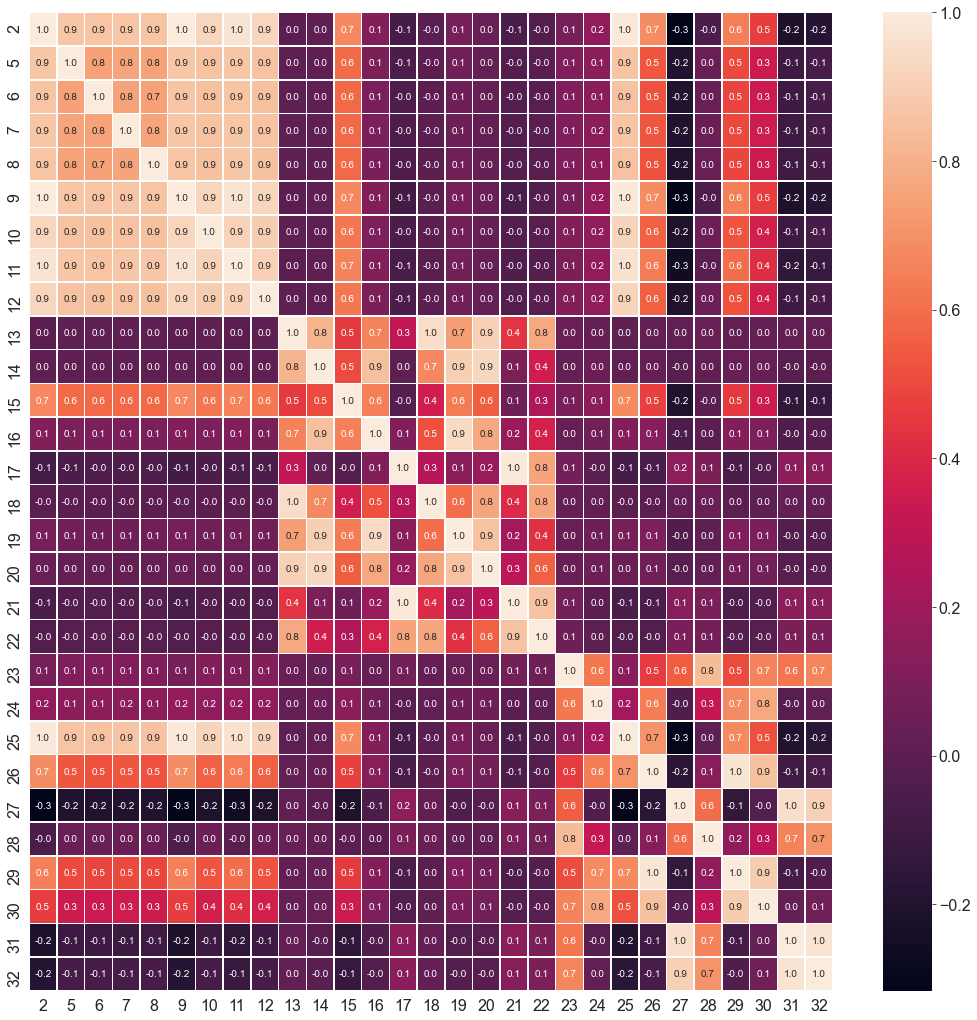

In [25]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

> from the heatmap we can see that the first 10 features are highly correlated with each other, as well as "25".

> I think they are a good start with feature selection and RF classification.

## Feature Selection and Random Forest Classification 

In [26]:
list_of_features = ['2','5','6','7','8','9','10','11','12','25']

x_1 = x[list_of_features]
x_1.head()

,2,5,6,7,8,9,10,11,12,25
0,5.0,12.033373,12.054637,12.032435,5.000000,5,2.0,3.0,11.812662,25149.0
1,4.0,12.033373,4.000000,12.032435,12.073628,4,1.0,2.0,1.000000,17529.0
2,9.0,3.000000,12.054637,5.000000,1.000000,9,4.0,5.0,11.812662,64317.0
3,15.0,5.000000,3.000000,2.000000,5.000000,15,5.0,5.0,5.000000,75808.0
4,7.0,7.000000,12.054637,12.032435,12.073628,7,2.0,3.0,2.000000,59983.0


<AxesSubplot:>

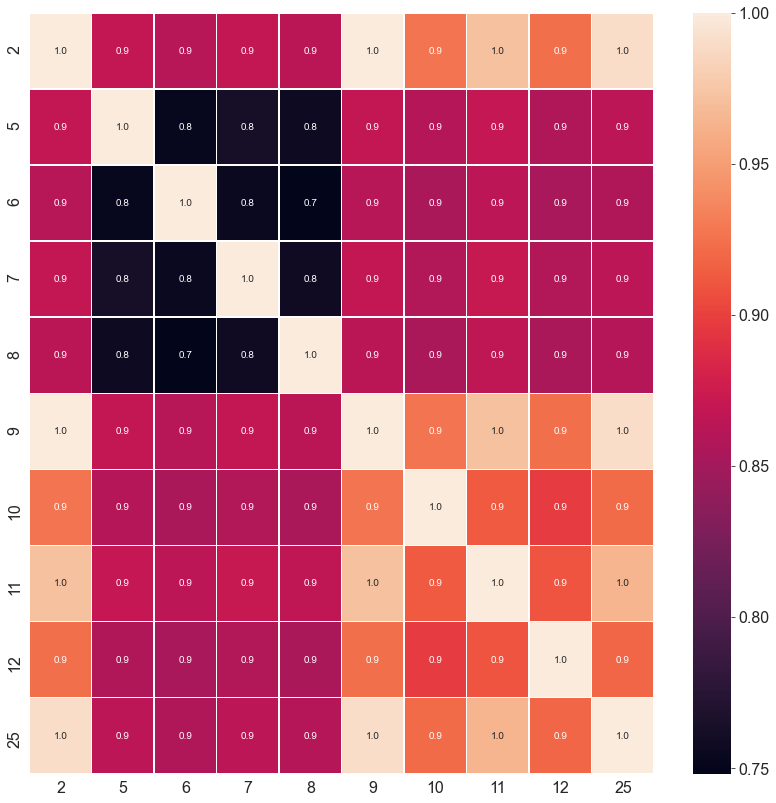

In [27]:
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(x_1.corr(), annot=True, linewidth=.5, fmt='.1f', ax=ax)

> Well, we choose our features but <b>did we choose correctly ?</b> Lets use random forest and find accuracy according to chosen features.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

Accuracy is:  0.9933073511624781


<AxesSubplot:>

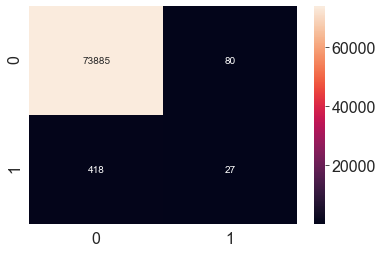

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state = 42)

clf_rf = RandomForestClassifier(random_state=42)
clr_rf = clf_rf.fit(x_train, y_train)

clf_predict = clf_rf.predict(x_test)

ac = accuracy_score(y_test, clf_predict)
print("Accuracy is: ",ac)

cm = confusion_matrix(y_test, clf_predict)

sns.heatmap(cm, annot=True, fmt='d')

> Accuracy is 99% as it can be seen in confusion matrix, we can make few wrong prediction. what we did up to now is that we choose features according to correlation matrix. We can try using <b>feature_selection</b> library to try get our feature choosen in a better way, which can lead us to more consisting results.

### Recursive feature elemination with cross validation and random forest classifcation 

In [30]:
from sklearn.feature_selection import RFECV

In [31]:
clf_rf_4 = RandomForestClassifier()

rfecv = RFECV(estimator = clf_rf_4, step =1, cv = 5, scoring ='accuracy')

rfecv.fit(x_train, y_train)

print('Optimal number of features: ', rfecv.n_features_)
print("Best features: ", x_train.columns[rfecv.support_])

Optimal number of features:  9
Best features:  Index(['2', '5', '6', '7', '8', '9', '11', '12', '25'], dtype='object')


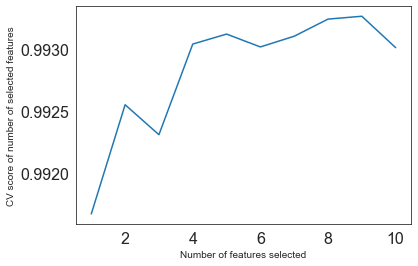

In [32]:
# Plot number of features VS. cross-validation scores

import matplotlib.pyplot as plt

plt.figure()

plt.xlabel("Number of features selected")
plt.ylabel("CV score of number of selected features")

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

### Feature extraction with PCA

Text(0, 0.5, 'explained_variance_ratio_')

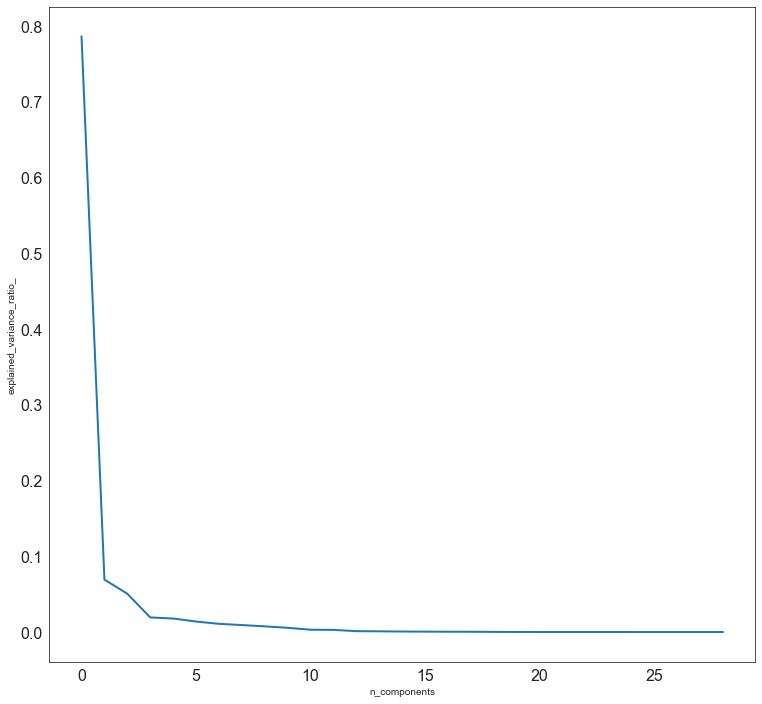

In [33]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.3, random_state=42)

##### Normalization #####
x_train_N = (x_train_1 - x_train_1.mean()) / (x_train_1.max() - x_train_1.min())
x_test_N = (x_test_1 - x_test_1.mean()) / (x_test_1.max() - x_test_1.min())

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_N)

##cop

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

> According to variance ration, 3 component can be chosen.

## Logistic Regression 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 

In [46]:
# initantiate our model  
logreg = LogisticRegression(max_iter=500)

# steps for our pipeline 
steps = [('scaler',StandardScaler()), ('logreg',logreg)]

# Init our pipeline 
pipeline = Pipeline(steps)

# Fit your model using gridsearch
clf = pipeline.fit(x_train,y_train)


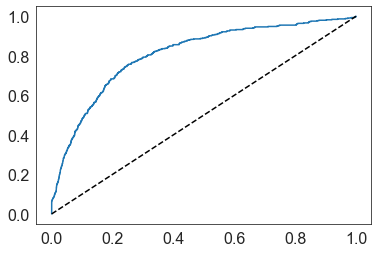

In [49]:
y_pred_prob = pipeline.predict_proba(x_test)[:, 1]

fpr, tpr, thresh = roc_curve(y_test,y_pred_prob)

plt.plot(fpr, tpr, label='logistic regression')
plt.plot([0,1],[0,1],"k--")

In [50]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline,x_train,y_train, cv=5, scoring='f1')

In [51]:
cv_scores

array([0.07582938, 0.10232558, 0.09345794, 0.11981567, 0.06666667])